### Problem 1

a) Code the Conjugate Gradient Method and apply it to solve a simple $$Hx=b$$ system, with H’s dimension as 10×10.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Threshhold for the gradient for termination
epsilon_threshhold = 0.001

def conjugate_gradient(H,b,initial_point = np.array([[3],[1]])):

    x_k = initial_point
    # Compute gradient
    r_k = np.matmul(H,initial_point) - b
    # Descent Direction
    p_k = -r_k
    
    iterations = 0
    iterates = []
    iterates.append(x_k.copy())
    while np.linalg.norm(r_k) > epsilon_threshhold:
        
        # Calculate the exact step length to take in the descent direction
        a_k_num = -np.matmul(r_k.T,p_k)
        a_k_denom = np.matmul(p_k.T,np.matmul(H,p_k))
        a_k = a_k_num / a_k_denom

        # Perform Descent
        x_k = x_k + a_k*p_k

        # Compute the gradient at the newly arrived point
        r_k = np.matmul(H,x_k) - b

        # Calculating beta_k such that p_(k-1) and p_k are conjguate with respect to H
        b_k_num = np.matmul(p_k.T,np.matmul(H,r_k))
        b_k_denom = np.matmul(p_k.T,np.matmul(H,p_k))
        b_k = b_k_num / b_k_denom

        # The new Conjugate Descent Direction
        p_k = -r_k + b_k*p_k
        iterates.append(x_k.copy())
        iterations+=1
        
    return iterations,x_k,iterates

In [2]:
# Solve a simple Hx = b System

random_matrix = np.random.randn(10,10)
# Ensuring Positive Definite Condition which is needed for Conjugate Gradient Method
H = np.matmul(random_matrix,random_matrix.T) # H (10*10 Matrix)
b = np.random.randn(10,1) # Hx = b


initial_point = np.zeros((10,1))
iterations, ans , iterates = conjugate_gradient(H,b,initial_point)

lib_ans = np.linalg.solve(H,b)

print("Solution returned by Conjugate Gradient custom implementation")
print("--------")
print(str(ans))
print("\nSolution returned by numpy.linalg.solve")
print("--------")
print(str(lib_ans))

Solution returned by Conjugate Gradient custom implementation
--------
[[-6.80277951]
 [ 1.26001179]
 [ 3.95456961]
 [-0.39895921]
 [-0.72454034]
 [-0.78185227]
 [-3.14358323]
 [-2.39529017]
 [ 0.24121157]
 [-3.34942678]]

Solution returned by numpy.linalg.solve
--------
[[-6.80277951]
 [ 1.26001179]
 [ 3.95456961]
 [-0.39895921]
 [-0.72454034]
 [-0.78185227]
 [-3.14358323]
 [-2.39529017]
 [ 0.24121157]
 [-3.34942678]]


b) Construct  matrices  with  various  eigenvalue  distributions  (clustered  and  non-clustered)and apply the above CG method to them.  Comment on the behaviour of the CG method in terms of convergence.

In [45]:
import numpy as np

np.random.seed(0) # Setting Random Seed inorder to get determinisitic results

mu, sigma = 1, 0.01 # mean and standard deviation m
# mean will denote the cluster center and sigma denote the range from which we want to sample cluster points
s1 = np.random.normal(mu, sigma, 3)
s2 = np.random.normal(mu+1,sigma,3)
s3 = np.random.normal(mu+2, sigma, 3)


eigen_values_clustered = np.concatenate([s1,s2,s3])


non_clustered_eigen_values = []
starting_point = np.random.randn()
for i in range(9):
    non_clustered_eigen_values.append(starting_point + i/2) # To avoid clustering make distance to subsequent nodes high
eigen_values_non_clustered = np.array(non_clustered_eigen_values)


import time
t = 1000 * time.time() # current time in milliseconds
np.random.seed(int(t) % 2**32) # Resetting the seed value set to another value

In [46]:
from scipy.linalg import orth

D_clustered = np.diag(eigen_values_clustered)
D_non_clustered = np.diag(eigen_values_non_clustered)
random_matrix = np.random.randn(9,9)
basis = orth(random_matrix)


# Using the formula for SVD the variable basis acts as the matrix for the eigen vectors
clustered_H = np.matmul(basis,np.matmul(D_clustered,basis.T))
non_clustered_H = np.matmul(basis,np.matmul(D_non_clustered,basis.T))

initial_point = np.zeros((9,1))

# Setting the value of b for both systems such that the optimal points x* is the same for both cases for comparison purposes
b_clustered = np.random.randn(9,1)
optima_clustered = conjugate_gradient(clustered_H,b_clustered,initial_point)[1]
b_non_clustered = np.matmul(non_clustered_H,optima_clustered)

optimal_solution_clustered = np.linalg.solve(clustered_H,b_clustered)
optimal_solution_non_clustered = np.linalg.solve(non_clustered_H,b_non_clustered)

In [47]:
# Determine the eigen values of the Hessian Matrices defined.
eig_val_cl , eig_vec_cl = np.linalg.eig(clustered_H)
eig_val_ncl, eig_vec_ncl = np.linalg.eig(non_clustered_H)
eig_val_cl[::-1].sort()
eig_val_ncl[::-1].sort()

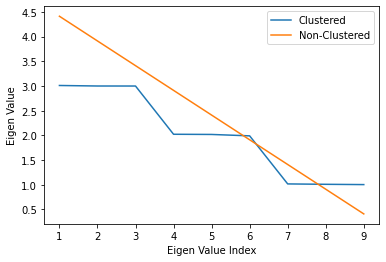

In [48]:
# Showing the Distribution of Eigen Values
indices = np.arange(1,clustered_H.shape[0]+1,dtype=np.int64)
plt.plot(indices,eig_val_cl,label="Clustered")
plt.plot(indices,eig_val_ncl,label="Non-Clustered")
plt.legend(loc='upper right')
plt.xlabel('Eigen Value Index')
plt.ylabel('Eigen Value')
plt.show()

- We can see the presence of three distinct clusters of eigen values in the Clustered case (Line almost parallel to x axis)


In [49]:
# Obtain the solutions from the Conjugate Desecent method

it_cl,ans_cl,iterates_cl = conjugate_gradient(clustered_H,b_clustered,initial_point)
it_ncl,ans_ncl,iterates_ncl = conjugate_gradient(non_clustered_H,b_non_clustered,initial_point)

print("Iterations taken to converge (Clustered Hessian) = " + str(it_cl))
print("Iterations taken to converge (Non-Clustered Hessian) = " + str(it_ncl))

Iterations taken to converge (Clustered Hessian) = 4
Iterations taken to converge (Non-Clustered Hessian) = 9


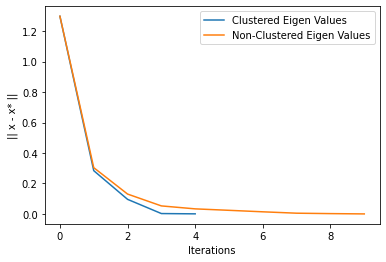

In [50]:
distance_to_optima_cl = []
distance_to_optima_ncl = []

for i in range(len(iterates_cl)):
    distance_to_optima_cl.append(np.linalg.norm(iterates_cl[i]- optimal_solution_clustered))

for i in range(len(iterates_ncl)):
    distance_to_optima_ncl.append(np.linalg.norm(iterates_ncl[i]-optimal_solution_non_clustered))

indices_1 = np.arange(len(distance_to_optima_cl))
plt.plot(indices_1,distance_to_optima_cl,label='Clustered Eigen Values')
indices_2 = np.arange(len(distance_to_optima_ncl))
plt.plot(indices_2,distance_to_optima_ncl,label='Non-Clustered Eigen Values')

plt.xlabel("Iterations")
plt.ylabel("|| x - x* ||")
plt.legend(loc='upper right')
plt.show()


### Iterations

| Eigen Value Distribution 	|  Iterations 	|
|---	|---	|
|  Clustered Eigen Values Hessian 	|   5	| 
|  Non-Clustered Eigen Values Hessian 	|  9	|   	

From the plot above above we see

- The convergence when H has Non-Clustered Eigen Values is slower compared to the case eigen values are Clustered.

- We could see a case of steep decrease in the error plot when H has Clustered Eigen Values, The decrease in error with iterations is much uniform in the Non-Clustered Case.

- if the eigenvalues occur in r distinct clusters, the CG iterates will approximately solve the problem in about r steps (Nocedal Wright). We can see from the error plots that the error approaches close to 0 when the number of iterations was 3 which is the number of clusters in our eigen values which we chose.

-------
### Question 2

 Your start-up will face the cash requirements shown in Table 1 in the next eight quarters(positive entries represent cash needs while negative entries represent cash surpluses).The company has three borrowing possibilities.

|   Q1	|   Q2	|  Q3 	|   Q4	|   Q5	| Q6  | Q7 | Q8 |  
|---	|---	|---	|---	|---	|---  |--- |--- |
|   100	|   500	|  100 	|  -600 	|  -500 	|  200  | 600   | -900   |

- a 2-year loan available at the beginning of Q1, with a 1% interest per quarter.
- The other two borrowing opportunities are available at the beginning of every quarter: a 6-month loan with a 1.8% interest per quarter, and a quarterly loan with a 2.5% interest for the quarter.

Any surplus can be invested at a 0.5% interest per quarter.

a) Formulate a LP that maximizes the wealth of the company at the beginning of Q9.

#### Varaibles

- a denotes the 2 year loan amount taken at quarter 1
- $b_i$ denotes the 6 month loan taken at quarter i
- $c_i$ denotes the 3 month loan (1 quarter) taken at quarter i
- $d_i$ denotes the surplus from quarter i which is invested 


#### Assumptions made during formulation

- Surplus invested at quarter i ($d_i$) can be withdrawn at i+1 ($d_{i+1}$)

- The loan repayment is done using "Amortization" technique (https://en.wikipedia.org/wiki/Amortization_(accounting))

    - Example:  Suppose a loan for an amount P is issued for a period of n quarters with an interest rate of i% per quarter then the amount to be paid back at each quarter for n quarters would be

    $$
        A = \frac{P*i*(i+1)^n}{(i+1)^n-1}
    $$
    which is a constant throughout the period of the loan

- We assume all loans have been repayed at the beginning of quarter 9.
 So we assume we can't take loans an quarters 7,8 for 6 month loan and quarter 8 for 1 quarter loan. The amortization amount for the 2 year loan is taken for a period of 7 quarters instead of 8 since the total loan period based on the given data is 7. (Without this assumption the linear program was giving infeasible results.)


#### Calculation

- Given Rate of interest per quarter for 6 month loan (2 quarters)  = 1.8% = 0.018 = $r_b$
  The amount to be paid at each quarter would be for a loan amount P
    $$
        A_b  = \frac{P*r_b*(r_b+1)^2}{(r_b+1)^2 - 1} =  P*\frac{0.018* (1.018^2) }{(1.018^2 - 1)} = P* R_b
    $$
- Similarly for the 3month loan ($r_c = 0.025$) 
    $$
        A_c = \frac{P*r_c*(r_c+1)^1}{(r_c+1)^1 - 1} =  P*\frac{0.025* (1.025) }{(1.025 - 1)} = P* R_c
    $$
- For the 2 year loan  ($r_a = 0.01$)
$$
        A_a = \frac{P*r_a*(r_a+1)^7}{(r_a+1)^7 - 1} =  P*\frac{0.01* (1.01)^7 }{(1.01^7 - 1)} = P* R_a \text{  [Note Period = 7 from assumption] . }

$$
- If amount P is the surplus amount at quarter $i$, then amount that can be withdrawn at the next quarter (Compund interest) is

$$
(1 + r_d)*P  
$$
$$
r_d = 0.005
$$
    
#### Formulation



- The wealth of the company at the beginning of quarter 9 is given by the surplus at quarter 8 So our objective function would be
    
    $$
        max \text{   } d_{8}
    $$


b)  Write a program that implements the revised simplex algorithm.


In [51]:
import numpy as np
def revised_simplex_method(A,b,c,b_vars,nb_vars):
    
    # Stores the final answer
    final_ans = np.zeros((len(b_vars)+len(nb_vars),))
    # Number of iterations taken for revised simplex
    iterations = 0
    while True:
        
        #print("Basic Variables bef =" + str(b_vars))
        #print("Non Basic Variables bef = " + str(nb_vars))

        # Get only columns corresponding to the Basic Variables and Non Basic Variables and assign it
        # to B, N , c_B , c_N

        B = A[:,b_vars]
        N = A[:,nb_vars]
        c_B = c[b_vars,:]
        c_N = c[nb_vars,:]

        #print(B.shape)
        #print(b.shape)
        
        # Solve x_B = B^-1 b
        x_B = np.linalg.solve(B,b)
        # Solve for Lagranagian Multipliers
        lambda_ = np.linalg.solve(B.T,c_B)
        # Get the values for s_N
        s_N =c_N - np.matmul(N.T,lambda_)  # Pricing

        #print("x_B = " + str(x_B) )
        #print("lambda = " + str(lambda_))
        #print("s_N = " + str(s_N))

        # C
        if np.all(s_N>=0) :
            # All Lagrangian Multipliers are positive. We have reached a solution
            final_ans[b_vars] = x_B.squeeze(1)
            print("Number of Iterations taken for revised simplex = " + str(iterations))
            return True,final_ans

        # Index in the Non Basic Variable Set corresponding to the lagrangian multiplier having highest negative value
        q = int(np.argmin(s_N,axis=0))
        # Get the corresponding column from
        A_q = np.expand_dims(A[:,nb_vars[q]],axis=1)

        # Find the direction
        d = np.linalg.solve(B,A_q)

        #print("q = " + str(q))
        #print("d = " + str(d))

        # Checking if feasible region is unbounded.
        if np.all(d<=0):
            print("Feasible Region Unbounded")
            return False,np.zeros((len(b_vars)+len(nb_vars),)) 

        
        x_q = np.inf
        p = x_B.shape[0] # To store the leaving basic variable.
        
        d_positive = d>0
        for i in range(x_B.shape[0]):
            # Only compute for those indexes where d[i,0] is positive.
            if d_positive[i,0]:
                ratio = x_B[i,0] / d[i,0]
                if ratio < x_q:
                    x_q = ratio
                    p = i
        
        # Swap a Basic variable for the Non Basic Variable
        tmp = b_vars[p]
        b_vars[p] = nb_vars[q]
        nb_vars[q] = tmp

        b_vars.sort()
        nb_vars.sort()
        iterations+=1

        #print("Basic Variables = " + str(b_vars))
        #print("Non Basic Variables = " + str(nb_vars))
        #print("---------")



In [52]:
# Starting the Simplex Method
def find_initial_point(A,b,c):
    
    # Vector e in e^T z
    e = np.zeros((A.shape[1]+A.shape[0],1))
    # Set values to 1 corresponding to artificial variables
    e[A.shape[1]:,:] = 1
    
    # Create an Augmented A Matrix
    A_new = np.zeros((A.shape[0],A.shape[1]+A.shape[0]))
    A_new[:A.shape[0],:A.shape[1]] = A.copy()
    
    # To ensure z>=0  for artifical variables
    for i in range(b.shape[0]):
        if b[i,0] < 0:
            A_new[i,A.shape[1]+i] = -1
        else:
            A_new[i,A.shape[1]+i] = 1
    
    # Basic Variables will be the artificial variables introduced
    b_vars = [ i for i in range(A.shape[1],A.shape[1]+A.shape[0]) ]
    nb_vars = [ i for i in range(A.shape[1])]
    print("Initial Point Finding")
    flag,solution = revised_simplex_method(A_new,b,e,b_vars,nb_vars)
    return flag,solution

c) Solve the above LP using your program and report the final results.

In [53]:
def print_results(labels,values):
    for i in range(1,len(labels)):
        print(str(labels[i]) + "=" + str(values[i]))

In [54]:
from scipy.optimize import linprog

r_a = 0.01
r_b = 0.018
r_c = 0.025
r_d = 0.005

A = np.zeros((8,25))
a_rate = r_a*((1+r_a)**7)/(((1+r_a)**7)-1)  # Compute A_a 
b_rate = r_b*((1+r_b)**2)/(((1+r_b)**2)-1)  # Compute A_b
c_rate = 1 + r_c  # Compute A_c
d_rate = 1 + r_d  # Compute A_d


A[0,0] = 1
for i in range(1,8):
    A[i,0] = -a_rate

for i in range(8):
    
    if i==6:
        A[i,(3*i)+2] = 1
        A[i,(3*i)+3] = -1
    elif i==7:
        A[i,(3*i)+3] = -1
    else:
        A[i,(3*i)+1] = 1
        A[i,(3*i)+2] = 1
        A[i,(3*i)+3] = -1

    if ((i-1)>=0):
        A[i,(3*(i-1)+1)] = -b_rate
        A[i,(3*(i-1)+2)] = -c_rate
        A[i,(3*(i-1)+3)] =  d_rate

    if((i-2)>=0):
        A[i,(3*(i-2)+1)] = -b_rate

b = np.array([[100],[500],[100],[-600],[-500],[200],[600],[-900]])
c = np.zeros((25,1))
c[24,0] = -1

labels = ["a"]
for i in range(len(b)):
    labels.append("b" + str(i+1))
    labels.append("c" + str(i+1))
    labels.append("d" + str(i+1))

In [55]:
flag,initial_solution = find_initial_point(A,b,c)
if (not np.all(np.isclose(initial_solution[A.shape[1]:],np.zeros((A.shape[0],)))))or(not flag):
    print("No Initial Feasible Solution; Solution doesnt exist")
else:
    b_vars = []
    nb_vars = []

    for i in range(A.shape[1]):
        if initial_solution[i] == 0.0:
            nb_vars.append(i)
        else:
            b_vars.append(i)
    print("#############\n")
    print("Answer Finding")
    flag,ans = revised_simplex_method(A,b,c,b_vars,nb_vars)
    if flag:
       print("Solution Computed by Revised Simplex Method\n")
       print_results(labels,ans)
    else:
        print("Couldnt find a solution to the linear program")

Initial Point Finding
Number of Iterations taken for revised simplex = 9
#############

Answer Finding
Number of Iterations taken for revised simplex = 2
Solution Computed by Revised Simplex Method

b1=0.0
c1=0.0
d1=601.2141900755666
b2=0.0
c2=0.0
d2=0.0
b3=204.2202610259444
c3=0.0
d3=0.0
b4=0.0
c4=0.0
d4=390.9044377909779
b5=0.0
c5=0.0
d5=683.7633977709107
b6=0.0
c6=0.0
d6=382.96195373382074
b7=0.0
c7=319.34349752345463
d7=0.0
b8=0.0
c8=0.0
d8=468.45265401251464


### Results

|  Variables | Revised Simplex Method  |  
|---|---|
| a  |   |   
| b1  |   |  
| c1  |   |   
| d1  |   |   
| b2  |   |   
| c2 |   |    
|  d2 |   |    
| b3  |   |    
| c3  |   |   
| d3  |   |  
| b4  |   |   
| c4  |   |   
| d4  |   |    
| b5  |   |   
| c5  |   |   
| d5  |   |   
| b6  |   |   
| c6  |   |  
| d6  |   |   
| b7  |   |    
| c7  |   |   
| d7  |   |    
| b8  |   |    
| c8  |   |    
| d8  |   |    






d)   Use  PuLP  and  scipy.optimize.linprog  to  verify  your  answer.   Change  the  optimization algorithm  used  by  the  solver  -  try  interior  point,  revised-simplex  and  dual-simplex.   Comment  on findings.

#### PULP

In [44]:
from pulp import *

model = model = LpProblem("ProfitMaximizationProblem", LpMaximize) # We want to maximize surplus from quarter 8

r_a = 0.01
r_b = 0.018
r_c = 0.025
r_d = 0.005

a_rate = r_a*((1+r_a)**7)/(((1+r_a)**7)-1)
b_rate = r_b*((1+r_b)**2)/(((1+r_b)**2)-1)
c_rate = 1 + r_c
d_rate = 1 + r_d

a = LpVariable(name="a",lowBound=0,upBound=None)

b_variables = []
c_variables = []
d_variables = []

b = np.array([[100],[500],[100],[-600],[-500],[200],[600],[-900]])


for i in range(1,9):
    b_variables.append(LpVariable(name="b"+str(i),lowBound=0,upBound=None))
    c_variables.append(LpVariable(name="c"+str(i),lowBound=0,upBound=None))
    d_variables.append(LpVariable(name="d"+str(i),lowBound=0,upBound=None))


model += d_variables[7]
for i in range(1,9):
    if i==1:
        model += a + b_variables[i-1] + c_variables[i-1] - d_variables[i-1] == float(b[i-1,0])
    elif i==2:
        model += b_variables[i-1] + c_variables[i-1] - d_variables[i-1] - a_rate*a - b_rate*b_variables[i-2] -c_rate*c_variables[i-2] + d_rate*d_variables[i-2] == float(b[i-1,0])
    elif i==7:
        model +=  c_variables[i-1] - d_variables[i-1] - a_rate*a - b_rate*b_variables[i-2] -b_rate*b_variables[i-3] -c_rate*c_variables[i-2] + d_rate*d_variables[i-2] == float(b[i-1,0])
    elif i==8:
        model +=  - d_variables[i-1] - a_rate*a - b_rate*b_variables[i-2] -b_rate*b_variables[i-3] -c_rate*c_variables[i-2] + d_rate*d_variables[i-2] == float(b[i-1,0])
    else:
        model += b_variables[i-1] + c_variables[i-1] - d_variables[i-1] - a_rate*a - b_rate*b_variables[i-2] -b_rate*b_variables[i-3] -c_rate*c_variables[i-2] + d_rate*d_variables[i-2] == float(b[i-1,0])

print(model)
model.solve()
for v in model.variables():
    print(v.name, "=", v.varValue)

ProfitMaximizationProblem:
MAXIMIZE
1*d8 + 0
SUBJECT TO
_C1: a + b1 + c1 - d1 = 100

_C2: - 0.148628282914 a - 0.513540138751 b1 + b2 - 1.025 c1 + c2 + 1.005 d1
 - d2 = 500

_C3: - 0.148628282914 a - 0.513540138751 b1 - 0.513540138751 b2 + b3
 - 1.025 c2 + c3 + 1.005 d2 - d3 = 100

_C4: - 0.148628282914 a - 0.513540138751 b2 - 0.513540138751 b3 + b4
 - 1.025 c3 + c4 + 1.005 d3 - d4 = -600

_C5: - 0.148628282914 a - 0.513540138751 b3 - 0.513540138751 b4 + b5
 - 1.025 c4 + c5 + 1.005 d4 - d5 = -500

_C6: - 0.148628282914 a - 0.513540138751 b4 - 0.513540138751 b5 + b6
 - 1.025 c5 + c6 + 1.005 d5 - d6 = 200

_C7: - 0.148628282914 a - 0.513540138751 b5 - 0.513540138751 b6 - 1.025 c6
 + c7 + 1.005 d6 - d7 = 600

_C8: - 0.148628282914 a - 0.513540138751 b6 - 0.513540138751 b7 - 1.025 c7
 + 1.005 d7 - d8 = -900

VARIABLES
a Continuous
b1 Continuous
b2 Continuous
b3 Continuous
b4 Continuous
b5 Continuous
b6 Continuous
b7 Continuous
c1 Continuous
c2 Continuous
c3 Continuous
c4 Continuous
c5 Cont

### scipy.optimize

In [64]:
# Interior Point Method

from scipy.optimize import linprog

bounds = (0,None)
method = 'interior-point'
ans = linprog(c,None,None,A,b,bounds=bounds,method=method)

np.set_printoptions(suppress=True)
print("Solution Returned by Interior Point (Scipy)\n")
print_results(labels,ans.x)

Solution Returned by Interior Point (Scipy)

b1=2.7959482645356073e-05
c1=2.3077006025389646e-05
d1=601.214326525725
b2=6.485009058112992e-05
c2=3.239490782327792e-05
d2=0.00018559184409518853
b3=204.2198328225554
c3=0.0003590739602053329
d3=2.4258103620822193e-05
b4=2.6047386407764062e-05
c4=2.6044710029695595e-05
d4=390.9043179264846
b5=2.3597740996016948e-05
c5=2.1298278289172832e-05
d5=683.7634875225184
b6=5.7705860807728955e-05
c6=2.670179719291985e-05
d6=382.9620691239587
b7=1.0128157505746805e-06
c7=319.3434842074195
d7=2.313506545968386e-05
b8=156.4087333908382
c8=156.4087333908382
d8=468.4526447626074


/var/folders/sm/_xvm618541nc11hb7mv_kpj40000gn/T/ipykernel_28503/1392415116.py:7: DeprecationWarning: `method='interior-point'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  ans = linprog(c,None,None,A,b,bounds=bounds,method=method)


In [65]:
method = 'revised simplex'
ans = linprog(c,None,None,A,b,bounds=bounds,method=method)

print("Solution Returned by Revised Simplex (Scipy)\n")
print_results(labels,ans.x)

Solution Returned by Revised Simplex (Scipy)

b1=0.0
c1=0.0
d1=601.2141900755666
b2=0.0
c2=0.0
d2=0.0
b3=204.22026102594452
c3=0.0
d3=0.0
b4=0.0
c4=0.0
d4=390.9044377909779
b5=0.0
c5=0.0
d5=683.7633977709106
b6=0.0
c6=0.0
d6=382.9619537338208
b7=0.0
c7=319.3434975234546
d7=0.0
b8=0.0
c8=0.0
d8=468.4526540125147


/var/folders/sm/_xvm618541nc11hb7mv_kpj40000gn/T/ipykernel_28503/1480264547.py:2: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  ans = linprog(c,None,None,A,b,bounds=bounds,method=method)


In [66]:
method = 'highs-ds'
ans = linprog(c,None,None,A,b,bounds=bounds,method=method)

np.set_printoptions(suppress=True)
print("Solution Returned by Dual Simplex (Scipy)\n")
print_results(labels,ans.x)

Solution Returned by Dual Simplex (Scipy)

b1=0.0
c1=0.0
d1=601.2141900755666
b2=0.0
c2=0.0
d2=0.0
b3=204.2202610259444
c3=0.0
d3=0.0
b4=0.0
c4=0.0
d4=390.90443779097797
b5=0.0
c5=0.0
d5=683.7633977709108
b6=0.0
c6=0.0
d6=382.9619537338209
b7=0.0
c7=319.34349752345446
d7=0.0
b8=0.0
c8=0.0
d8=468.4526540125148


|   | Our Program  | PULP  | Scipy Default | Scipy Interior Point  |  Scipy Revised simplex  | Scipy Dual Simplex  |   | 
|---|---|---|---|---|---|---|---| 
| a  |   |   |   |   |   |   |   | 
| b1  |   |   |   |   |   |   |   | 
| c1  |   |   |   |   |   |   |   | 
| d1  |   |   |   |   |   |   |   | 
| b2  |   |   |   |   |   |   |   | 
| c2 |   |   |   |   |   |   |   | 
|  d2 |   |   |   |   |   |   |   | 
| b3  |   |   |   |   |   |   |   | 
| c3  |   |   |   |   |   |   |   | 
| d3  |   |   |   |   |   |   |   | 
| b4  |   |   |   |   |   |   |   | 
| c4  |   |   |   |   |   |   |   | 
| d4  |   |   |   |   |   |   |   | 
| b5  |   |   |   |   |   |   |   | 
| c5  |   |   |   |   |   |   |   | 
| d5  |   |   |   |   |   |   |   | 
| b6  |   |   |   |   |   |   |   | 
| c6  |   |   |   |   |   |   |   | 
| d6  |   |   |   |   |   |   |   | 
| b7  |   |   |   |   |   |   |   | 
| c7  |   |   |   |   |   |   |   | 
| d7  |   |   |   |   |   |   |   | 
| b8  |   |   |   |   |   |   |   | 
| c8  |   |   |   |   |   |   |   | 
| d8  |   |   |   |   |   |   |   | 


------
### Question 3

a) Consider the problem

$$
min \text{  } x_{1}^{2}+ 2x_{2}^{2} − 2x_{1}−6x_{2}−2x_{1}x_{2},
$$

such that
$$
x_{1} + x_{2} \le 2
$$
$$
-x_{1} + 2x_{2} \le 2

$$

$$
x_{1},x_{2} >= 0 
$$

Solve geometrically (Plot the geometry and solution points to visualize)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

UPPER_LIMIT = 3
CONTOUR_LEVELS = 48
d = np.linspace(0,UPPER_LIMIT,1000)
x1,x2 = np.meshgrid(d,d)

# Show the Feasible Region
plt.imshow( (( (x1 + x2) <= 2) & ((-x1 + 2*x2) <= 2) & (x1>=0) & (x2>=0) ).astype(int) , 
                extent=(x1.min(),x2.max(),x2.min(),x2.max()),origin="lower", cmap="Greys", alpha = 0.3)

# Plot lines for the feasible region boundary
x1_ = np.linspace(0,UPPER_LIMIT,500)
x2_1 = 2 - x1_ 
x2_2 = (2 + x1_)/2

# Objective Function
z = x1**2 + 2*(x2**2) - 2*x1 - 6*x2 - 2*x1*x2 

cs = plt.contour(x1,x2,z,levels=CONTOUR_LEVELS)
plt.plot(x1_,x2_1, label=r'$x1+x2\leq2$')
plt.plot(x1_,x2_2, label=r'$-x1+2x2\leq2$')
plt.clabel(cs,inline=True, fontsize='smaller')
plt.xlim(0,UPPER_LIMIT)
plt.ylim(0,UPPER_LIMIT)

plt.show()

- The function value increases as one moves away from $(5,4)$ which is the global minimum (Objective Function value = -17).
- The contour line corresponding to the objective function value $-7.2$ just touches the boundary of the feasible region.

- The contour line interesects the boundary line whose equation is $x_1 + x_2 = 2$

- Solving by pen and paper by substituting $x_2 = 2 - x_1$ in 
$$ 
    x_{1}^{2}+ 2x_{2}^{2} − 2x_{1}−6x_{2}−2x_{1}x_{2} = -7.2
$$

we get 
$$
x_1 = 0.8
$$
and 
$$
x_2 = 1.2
$$

which is the solution to the quadractic program

b) Implement the active set method for quadratic programs (Algo 16.3 in Nocedal and Wright(2006)).

In [ ]:

# Function for formulating the KKT System of Equations
def create_KKT_Matrix(G,A_ne,b_ne,c,active_indices,point):
    
    #  Form the matrix [[G A^T],[A 0]]
    KKT_matrix = np.zeros((G.shape[0]+len(active_indices),G.shape[1]+len(active_indices)))
    KKT_matrix[:G.shape[0],:G.shape[1]] = G.copy()
    KKT_matrix[:G.shape[0],G.shape[1]:] = A_ne[active_indices].T
    KKT_matrix[G.shape[0]:,:G.shape[1]] = A_ne[active_indices]
    
    # Form the vector [ [Gx + c], [Ax - b] ]
    rhs = np.zeros((c.shape[0]+b_ne[active_indices].shape[0],1))
    
    Gx_plus_c = np.matmul(G,point) + c
    Ax_minus_b  = np.matmul(A_ne[active_indices],point) - b_ne[active_indices]
    rhs[:c.shape[0],:] = Gx_plus_c
    rhs[c.shape[0]:,:] = Ax_minus_b


    return KKT_matrix,rhs

# Funtion for calculating the step length to take when
# moving from one point to the next.
def compute_step_length(p,A_ne,b_ne,active_indices,current_point):
    step_length = 1.0
    
    for i in range(A_ne.shape[0]):
        if i not in active_indices:
            # Calculate only for the ith inequality which satisfied a_i^T p_k < 0
            if (np.all(np.matmul(A_ne[i,:],p) < 0)):
                
                # Step length using the formula in Nocedal Wright
                numerator = b_ne[i,0] - np.matmul(A_ne[i,:],current_point)
                denominator = np.matmul(A_ne[i,:],p)
                #print("Numerator = " + str(numerator))
                #print("Denominator = " + str(denominator))
                step = float(numerator/denominator)
                step_length = min(step,step_length)
    
    return step_length


def active_set_method(G,c,A_ne,b_ne,initial_point):

    #  A_ne , b_ne , H , initial_point
    current_point = initial_point.copy()
    reached_new_point = True
    active_indices = []
    #print(active_indices)
    iterations = 0
    
    while True:
        if reached_new_point:
           
            # Determining the constraints which are active at the current point reached
            Ax =  np.matmul(A_ne,current_point)
            Ax_diff = (Ax - b_ne).squeeze(1)
            active_indices = np.where(Ax_diff==0)[0].tolist()
        
        # Formulate the KKT System of Equations and solve it
        mat = create_KKT_Matrix(G,A_ne,b_ne,c,active_indices,current_point)
        sol_vector = np.linalg.solve(mat[0],mat[1])
        
        #print(sol_vector)
        
        # Get the direction to move and the value of Lagrange Multipliers
        p = sol_vector[:G.shape[0],:]
        lambda_ = sol_vector[G.shape[0]:,:]
    
        #print("current_point = " + str(current_point))
        #print("increment = " + str(p))
        #print("lambda = " + str(lambda_))
        
        # If p = 0
        if ( np.all(np.isclose(p,np.zeros((p.shape[0],p.shape[1]))))):
            
            reached_new_point=False
            if np.all(lambda_>=0):
                # If the value of all Lagrange Multipliers are positive we got a solution 
                return iterations,current_point
            else:
                # Remove an active constraint from the working set
                rm_constraint_idx = int(np.argmin(lambda_,axis=0))
                del active_indices[rm_constraint_idx]
                active_indices
        else:
            # Compute the step length to take along p
            alpha = compute_step_length(-p,A_ne,b_ne,active_indices,current_point)  
            #print("Alpha value =" + str(alpha) )
  
            new_point = current_point + alpha*(-p)
            current_point = new_point
            reached_new_point=True
        
        #print("----------")
        iterations+=1


In [ ]:
G = np.array([[2,-2],[-2,4]])
c = np.array([[-2],[-6]])
A_ne = np.array([[-1,-1],[1,-2],[1.0,0.0],[0.0,1.0]])  #Convert constraints to the form in Nocedal Wright
b_ne = np.array([[-2],[-2],[0],[0]])


initial_point_vertex = np.array([[0],[0]])       # Vertex point 
initial_point_edge = np.array([[0.2],[1.1]])     # Point on the edge of the boundary
initial_point_interior = np.array([[0.6],[0.7]]) # Point on the interior of the Feasible Region


it, sol = active_set_method(G,c,A_ne,b_ne,initial_point_vertex)
print("Iterations taken to converge Initial_point = " + str(initial_point_vertex.tolist()) + "] = " + str(it))
print("Solution Returned by the Active Set Method [Initial_point =  " + str(initial_point_vertex.tolist()) + "]" )
print(str(sol))


print("-------------------------------")
it, sol = active_set_method(G,c,A_ne,b_ne,initial_point_edge)
print("Iterations taken to converge Initial_point = " + str(initial_point_edge.tolist()) + "] = " + str(it))
print("Solution Returned by the Active Set Method [Initial_point =  " + str(initial_point_edge.tolist()) + "]" )
print(str(sol))
print("-------------------------------")

it, sol = active_set_method(G,c,A_ne,b_ne,initial_point_interior)
print("Iterations taken to converge Initial_point = " + str(initial_point_interior.tolist()) + "] = " + str(it))
print("Solution Returned by the Active Set Method [Initial_point =  " + str(initial_point_interior.tolist()) + "]" )
print(str(sol))

c) Choose  three  initial  starting  points:  
- one  in  the  interior  of  the  feasible  region
- one  at the vertex 
- one at a non-vertex point on the boundary of the feasible region.

Comment on the convergence properties

#### Interior of the Feasible Region

Taking several initial_points in the interior and averaging the number of iterations taken to converge

In [ ]:
interior_points_chosen = [
    np.array([[0.5],[0.5]]),
    np.array([[0.667],[0.1]]),    
    np.array([[0.4],[0.1]]),    
    np.array([[0.1],[0.1]]),
    np.array([[0.7],[0.8]]),
    np.array([[0.9],[0.3]]),
    np.array([[0.6],[0.7]]), 
]

it_avg = 0

for i in range(len(interior_points_chosen)):
    it,sol = active_set_method(G,c,A_ne,b_ne,interior_points_chosen[i])
    it_avg+=it
print("Average Number of Iterations taken to converge (Interior Initial Points) = " + str(it_avg/len(interior_points_chosen)))

#### Vertex of the Feasible Region

Considering all the vertices and averaging the number of iterations taken to converge

In [ ]:
vertices_chosen = [
    np.array([[0],[0]]),
    np.array([[0.667],[0.333]]),    
    np.array([[0],[1]]),    
    np.array([[2],[0]]),
]

it_avg = 0

for i in range(len(vertices_chosen)):
    it,sol = active_set_method(G,c,A_ne,b_ne,vertices_chosen[i])
    it_avg+=it

print("Average Number of Iterations taken to converge (Vertices) = " + str(it_avg/len(vertices_chosen)))



#### NonVertex Point on the boundary of the Feasible Region

Taking several initial_points in the interior and averaging the number of iterations taken to converge

In [ ]:
edge_vertices_chosen = [
    np.array([[0],[0.7]]),
    np.array([[0],[0.3]]),
    np.array([[0.5],[1.25]]),
    np.array([[0.3],[1.15]]),
    np.array([[1],[1]]),
    np.array([[1.4],[0.6]]),
    np.array([[1.5],[0]]),
    np.array([[0.3],[0]]),    
   
]

it_avg = 0

for i in range(len(edge_vertices_chosen)):
    it,sol = active_set_method(G,c,A_ne,b_ne,edge_vertices_chosen[i])
    it_avg+=it

print("Average Number of Iterations taken to converge (Vertices) = " + str(it_avg/len(edge_vertices_chosen)))


### Iterations

| Nature of Initial Point 	|  Iterations(Averaged)	|
|---	|---	|
|  Interior of Feasible Region 	|   2.71	| 
|  Vertex of Feasible Region 	|   4.0	|   	
|  NonVertex on Feasible Region Boundary 	|   3.75	|   



- The Average number of iterations taken to converge is the largest when the initial point is a vertex followed by a point on edge and an interior point.

- The Behaviour could be explained due to size of the active set at each point, we might need to drop some constraints from the active set which accounts for the extra iterations taken.

- The size of the active set is 2 for a vertex, 1 for a point on edge and 0 for an interior point.

d) Use CVXOPT and solve the above QP. What algorithm does CVXOPT use to solve QP? Understand and comment on your findings.

In [ ]:
from cvxopt import matrix, solvers

P_list =  np.array([[2.0,-2.0],[-2.0,4.0]])
q_list = np.array([-2.0,-6.0])
g_list = np.array([[-1.0,0.0],[0.0,-1.0],[1.0,1.0],[-1.0,2.0]])
h_list = np.array([[0.0],[0.0],[2.0],[2.0]])


P = matrix(P_list)
q = matrix(q_list)
g = matrix(g_list)
h = matrix(h_list)
solution = solvers.qp(P,q,g,h)

In [ ]:
print("Solution Returned by the CVXOPT Solver")
print(str(solution['x']))

### Solver Used by CVXOPT

From the documentation in https://cvxopt.org/userguide/coneprog.html we see

> The function qp is an interface to coneqp for quadratic programs.

From https://cvxopt.org/documentation/index.html#technical-documentation we see that coneqp is an **Interior Point Method**
> A discussion of the interior-point algorithms used in the conelp() and coneqp() solvers can be found 




- The Interior Point Method tries to reformulate the Inequality Constraints as Equality Constraints

- A barrier function is defined which takes smaller value in the interior of the feasible region while taking larger values on reaching towards the boundary inorder to trap the solution inside the feasible region.

- The cost function is modified to take account of the barrier function

(Reference : https://www.quora.com/What-is-the-intuition-behind-the-primal-dual-interior-point-method-in-optimization-theory)